In [20]:
!pip install statsmodels

     |████████████████████████████████| 9.9 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 1.2 MB/s eta 0:00:01


In [21]:
from astropy.io import ascii
import matplotlib.pylab as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

In [16]:
dat = ascii.read('SDSS_SMBH')

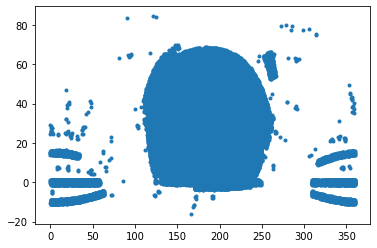

In [3]:
plt.plot(dat['col1'], dat['col2'], '.')

In [4]:
m = (dat['col2'] > 30)

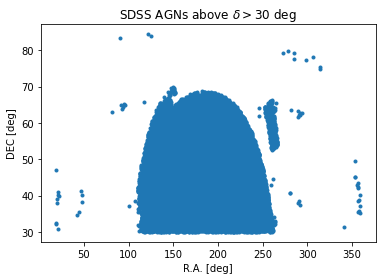

In [5]:
plt.plot(dat['col1'][m], dat['col2'][m], '.')
plt.xlabel('R.A. [deg]')
plt.ylabel('DEC [deg]')
_ = plt.title('SDSS AGNs above $\delta > 30$ deg')

In [30]:
print(len(np.where(m)[0]), len(dat))

19759 48346


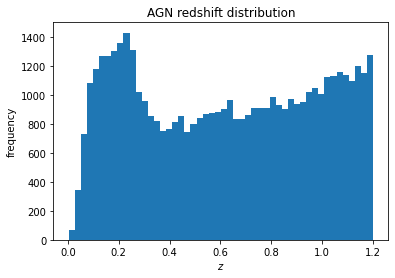

In [38]:
plt.hist(dat['col3'], bins=50)
plt.xlabel('$z$')
plt.ylabel('frequency')
_ = plt.title('AGN redshift distribution')

Text(0.5, 1.0, 'AGN SMBH mass distribution')

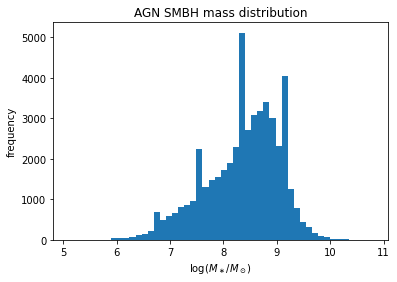

In [6]:
plt.hist(dat['col4'], bins=50)
plt.xlabel(r'$\log ( M_\ast / M_\odot )$')
plt.ylabel('frequency')
plt.title('AGN SMBH mass distribution')

In [44]:
# If we want to split the sample into two mass bins, best is maybe at the median
np.median(dat['col4'])

8.5

In [45]:
# To split into more equi-populated bins, compute cumulative distribution function
cdf = ECDF(dat['col4'])

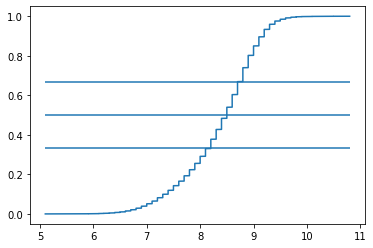

In [46]:
# Plot with some lines to split (e.g. 1/3, 2/3 for split into three samples)
plt.plot(cdf.x, cdf.y, '-')

xmin, xmax = cdf.x[1], cdf.x[-1]
# cdf.x[0] is -infinity

plt.hlines([1/3, 0.5, 2/3], xmin, xmax)

Find mass for split into equi-populated bins

In [56]:
def y_equi(cdf, n):
    x_list = []
    for denom in range(1, n):
        idx =  np.where(cdf.y >= denom/n)[0][0]
        x_list.append(cdf.x[idx])
    
    return x_list

In [60]:
# Split into two (check whether we get median from before)
y_equi(cdf, 2)

[8.5]

In [61]:
# Split into three
y_equi(cdf, 3)

[8.2, 8.7]

In [65]:
# We can play around...
y_equi(cdf, 5)

[7.8, 8.3, 8.6, 8.9]